# Importing libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [17]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Analysing the dataset

In [20]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-----------------")

region
3    344
2    334
1    322
Name: region, dtype: int64
-----------------
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64
-----------------
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: age, dtype: int64
-----------------
marital
0    505
1    495
Name: marital, dtype: int64
-----------------
address
1     68
2     66
4     61
3     61
0     56
7     53
5     50
9     41
8     39
10    38
12

In [22]:
df.drop(['ed', 'employ'], axis = 1, inplace = True)

In [23]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


# EDA

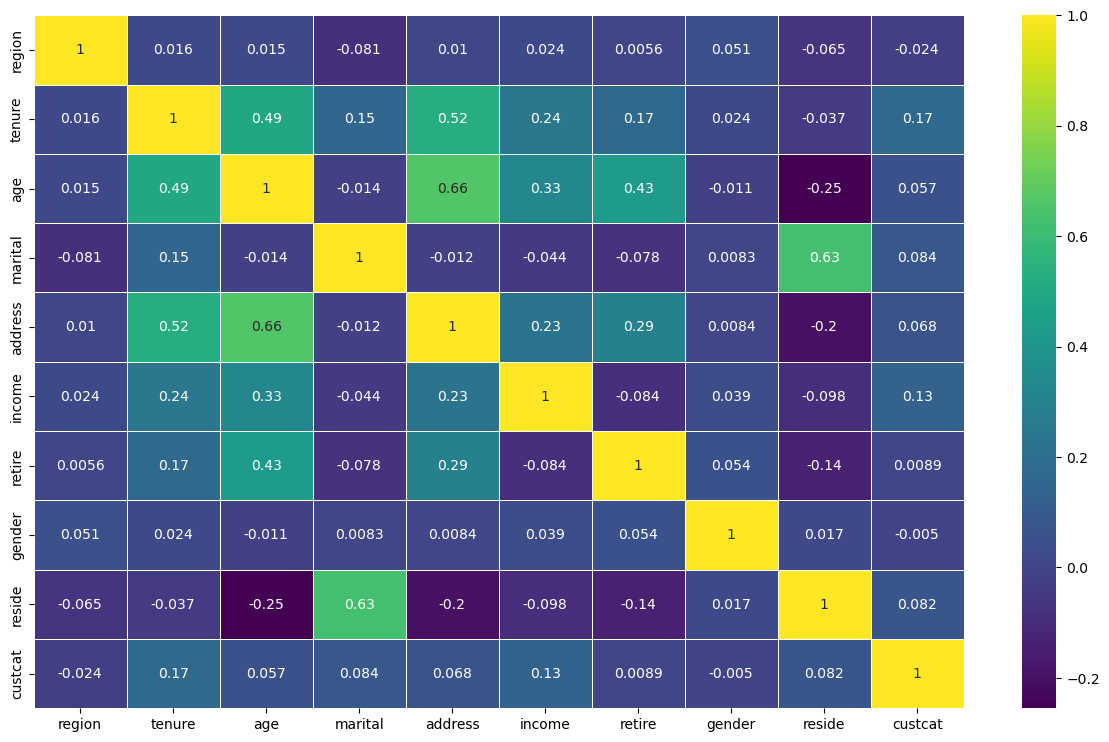

In [27]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='viridis')
plt.show()

In [28]:
df.drop(['retire', 'gender'], axis = 1, inplace = True)

In [29]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [30]:
region = pd.get_dummies(df['region'], drop_first = True, prefix = 'region')
reside = pd.get_dummies(df['reside'], drop_first = True, prefix = 'reside')

In [31]:
df.drop(['region', 'reside'], axis = 1, inplace = True)

In [33]:
df = pd.concat([df, region, reside], axis = 1)

In [34]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,1,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,4,0,1,0,0,0,0,1,0,0
2,68,52,1,24,116.0,3,0,1,1,0,0,0,0,0,0
3,33,33,0,12,33.0,1,1,0,0,0,0,0,0,0,0
4,23,30,1,9,30.0,3,1,0,0,0,1,0,0,0,0


# Standardization of variables

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaled_variable = df[['tenure', 'age', 'address', 'income']]

In [37]:
scaled_variable

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0
...,...,...,...,...
995,10,39,0,27.0
996,7,34,2,22.0
997,67,59,40,944.0
998,70,49,18,87.0


In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(scaled_variable)

StandardScaler()

In [40]:
scaled_variable = scaler.transform(scaled_variable)

In [41]:
df_scaled = pd.DataFrame(scaled_variable, columns = ['tenure', 'age', 'address', 'income'])

In [42]:
df_scaled.head()

,tenure,age,address,income
0,-1.055125,0.184505,-0.253034,-0.126506
1,-1.148806,-0.691812,-0.451415,0.546450
2,1.521092,0.821826,1.234819,0.359517
3,-0.118319,-0.691812,0.044536,-0.416251
4,-0.586722,-0.930808,-0.253034,-0.444291


In [43]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,1,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,4,0,1,0,0,0,0,1,0,0
2,68,52,1,24,116.0,3,0,1,1,0,0,0,0,0,0
3,33,33,0,12,33.0,1,1,0,0,0,0,0,0,0,0
4,23,30,1,9,30.0,3,1,0,0,0,1,0,0,0,0


In [45]:
df.drop(['tenure', 'age', 'address', 'income'], axis = 1, inplace = True)

In [46]:
df = pd.concat([df, df_scaled], axis = 1)

In [47]:
df.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income
0,1,1,1,0,1,0,0,0,0,0,0,-1.055125,0.184505,-0.253034,-0.126506
1,1,4,0,1,0,0,0,0,1,0,0,-1.148806,-0.691812,-0.451415,0.546450
2,1,3,0,1,1,0,0,0,0,0,0,1.521092,0.821826,1.234819,0.359517
3,0,1,1,0,0,0,0,0,0,0,0,-0.118319,-0.691812,0.044536,-0.416251
4,1,3,1,0,0,0,1,0,0,0,0,-0.586722,-0.930808,-0.253034,-0.444291


# KNN Modelling

In [50]:
x = df.drop(['custcat'], axis = 1)
y = df['custcat']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (800, 14) (800,)
test set: (200, 14) (200,)


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(x_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [59]:
y_pred = knn_model.predict(x_test)

In [60]:
from sklearn import metrics

In [61]:
print("Acuuracy score: ", metrics.accuracy_score(y_test, y_pred))

Acuuracy score:  0.325


In [62]:
k = 6
knn_model2 = KNeighborsClassifier(n_neighbors = k)
knn_model2.fit(x_train, y_train)
knn_model2

KNeighborsClassifier(n_neighbors=6)

In [63]:
y_pred = knn_model2.predict(x_test)

In [64]:
print("Acuuracy score: ", metrics.accuracy_score(y_test, y_pred))

Acuuracy score:  0.335
